<a href="https://colab.research.google.com/github/Univesp-PI-2022/TCC/blob/main/colab/seguranca_publica_2015_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Utilizando Spark 3.1.2 e Hadoop 2.7**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pre-install NGROK para poder acessar localhost
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [3]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName("MySparkApp") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [7]:
ngrok_token = "2TUUOtbWfyq69LXpF7D3PoXlucq_3kPdidRnY69TUzHRVPTrp"
get_ipython().system_raw('./ngrok authtoken ' + ngrok_token)
get_ipython().system_raw('./ngrok http 4050 &')

In [8]:
# obter atributo "public_url"
!curl -s http://localhost:4040/api/tunnels

In [9]:
spark

In [10]:
path = '/content/drive/MyDrive/TCC2023/ocorrencias.csv'
ocorrencias = spark.read.csv(path, sep=';', header=True, inferSchema=True)

In [11]:
path = '/content/drive/MyDrive/TCC2023/vitimas.csv'
vitimas = spark.read.csv(path, sep=';', header=True, inferSchema=True)

In [21]:
path = '/content/drive/MyDrive/TCC2023/violencia_2009_2021_tratado.csv'
violencia = spark.read.csv(path, sep=',', header=True, inferSchema=True)

In [29]:
violencia.count()

1700365

In [22]:
violencia.limit(10).toPandas()

,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,DT_OCOR,ANO_NASC,CS_GESTANT,CS_RACA,CS_ESCOL_N,...,ASSIST_SOC,REDE_EDUCA,ATEND_MULH,DIR_HUMAN,MPU,DELEG_MULH,DELEG,DEFEN_PUBL,DT_ENCERRA,IDADE
0,12/05/2009,2009.0,Paraná,412550.0,2753278.0,12/05/2009,2004.0,Não se aplica,Branca,Não aplicável,...,None,None,None,None,None,None,None,None,12/05/2009,5.0
1,01/12/2009,2009.0,Bahia,290270.0,2301687.0,01/12/2009,1980.0,Não,Preta,Ensino médio completo,...,None,None,None,None,None,None,None,None,01/12/2009,29.0
2,22/01/2009,2009.0,Goiás,520870.0,2338262.0,22/01/2009,1980.0,Ignorado,None,Ignorado,...,None,None,None,None,None,None,None,None,22/01/2009,29.0
3,01/03/2009,2009.0,Amazonas,130356.0,2708930.0,01/03/2009,NaN,Não,Parda,Fundamental II completo,...,None,None,None,None,None,None,None,None,01/03/2009,NaN
4,30/06/2009,2009.0,Pernambuco,260290.0,5581923.0,30/06/2009,2009.0,Não se aplica,Parda,Não aplicável,...,None,None,None,None,None,None,None,None,16/07/2009,0.0
5,26/01/2009,2009.0,Goiás,520870.0,2338262.0,26/01/2009,1988.0,Ignorado,None,Ignorado,...,None,None,None,None,None,None,None,None,26/01/2009,21.0
6,28/01/2009,2009.0,Goiás,520870.0,2338262.0,28/01/2009,1976.0,Ignorado,None,Ignorado,...,None,None,None,None,None,None,None,None,28/01/2009,33.0
7,28/01/2009,2009.0,Goiás,520870.0,2338262.0,28/01/2009,1969.0,Ignorado,None,Ignorado,...,None,None,None,None,None,None,None,None,28/01/2009,40.0
8,22/01/2009,2009.0,Goiás,520870.0,2338262.0,22/01/2009,1942.0,Não se aplica,None,Ignorado,...,None,None,None,None,None,None,None,None,22/01/2009,67.0
9,22/01/2009,2009.0,Goiás,520870.0,2338262.0,22/01/2009,1950.0,Não se aplica,None,Ignorado,...,None,None,None,None,None,None,None,None,22/01/2009,59.0


In [12]:
ocorrencias.limit(10).toPandas()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0
5,Acre,Roubo de carga,2022,janeiro,0
6,Acre,Roubo de veículo,2022,janeiro,72
7,Acre,Roubo seguido de morte (latrocínio),2022,janeiro,0
8,Acre,Tentativa de homicídio,2022,janeiro,22
9,Acre,Estupro,2022,fevereiro,34


In [13]:
vitimas.limit(10).toPandas()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10
5,Acre,Homicídio doloso,2022,fevereiro,Sexo NI,0
6,Acre,Homicídio doloso,2022,março,Feminino,2
7,Acre,Homicídio doloso,2022,março,Masculino,19
8,Acre,Homicídio doloso,2022,março,Sexo NI,0
9,Acre,Homicídio doloso,2022,abril,Feminino,2


In [14]:
ocorrencias.printSchema()

root
 |-- UF: string (nullable = true)
 |-- Tipo Crime: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Mês: string (nullable = true)
 |-- Ocorrências: integer (nullable = true)



In [15]:
vitimas.printSchema()

root
 |-- UF: string (nullable = true)
 |-- Tipo Crime: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Mês: string (nullable = true)
 |-- Sexo da Vítima: string (nullable = true)
 |-- Vítimas: integer (nullable = true)



In [23]:
violencia.printSchema()

root
 |-- DT_NOTIFIC: string (nullable = true)
 |-- NU_ANO: double (nullable = true)
 |-- SG_UF_NOT: string (nullable = true)
 |-- ID_MUNICIP: double (nullable = true)
 |-- ID_UNIDADE: double (nullable = true)
 |-- DT_OCOR: string (nullable = true)
 |-- ANO_NASC: double (nullable = true)
 |-- CS_GESTANT: string (nullable = true)
 |-- CS_RACA: string (nullable = true)
 |-- CS_ESCOL_N: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- ID_MN_RESI: double (nullable = true)
 |-- ID_PAIS: double (nullable = true)
 |-- ID_OCUPA_N: string (nullable = true)
 |-- SIT_CONJUG: string (nullable = true)
 |-- DEF_TRANS: string (nullable = true)
 |-- SG_UF_OCOR: string (nullable = true)
 |-- ID_MN_OCOR: double (nullable = true)
 |-- HORA_OCOR: string (nullable = true)
 |-- LOCAL_OCOR: string (nullable = true)
 |-- OUT_VEZES: string (nullable = true)
 |-- LES_AUTOP: string (nullable = true)
 |-- VIOL_FISIC: string (nullable = true)
 |-- VIOL_PSICO: string (nullable = true)
 |-- VIOL_TO

In [62]:
from pyspark.sql.types import DoubleType, StringType, IntegerType
from pyspark.sql import functions as f

In [27]:
for colName in violencia.columns:
  if (colName.startswith("DT_")):
    violencia = violencia\
            .withColumn(colName,
              f.to_date(f.col(colName).cast(StringType()), 'dd/MM/yyyy')
            )

In [28]:
violencia.printSchema()

root
 |-- DT_NOTIFIC: date (nullable = true)
 |-- NU_ANO: double (nullable = true)
 |-- SG_UF_NOT: string (nullable = true)
 |-- ID_MUNICIP: double (nullable = true)
 |-- ID_UNIDADE: double (nullable = true)
 |-- DT_OCOR: date (nullable = true)
 |-- ANO_NASC: double (nullable = true)
 |-- CS_GESTANT: string (nullable = true)
 |-- CS_RACA: string (nullable = true)
 |-- CS_ESCOL_N: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- ID_MN_RESI: double (nullable = true)
 |-- ID_PAIS: double (nullable = true)
 |-- ID_OCUPA_N: string (nullable = true)
 |-- SIT_CONJUG: string (nullable = true)
 |-- DEF_TRANS: string (nullable = true)
 |-- SG_UF_OCOR: string (nullable = true)
 |-- ID_MN_OCOR: double (nullable = true)
 |-- HORA_OCOR: string (nullable = true)
 |-- LOCAL_OCOR: string (nullable = true)
 |-- OUT_VEZES: string (nullable = true)
 |-- LES_AUTOP: string (nullable = true)
 |-- VIOL_FISIC: string (nullable = true)
 |-- VIOL_PSICO: string (nullable = true)
 |-- VIOL_TORT: 

In [17]:
vitimas\
  .select("Ano", "Tipo Crime", "Sexo da Vítima", "Vítimas")\
  .where(f.col("Sexo da Vítima") == "Feminino")\
  .groupBy("Ano", "Tipo Crime", "Sexo da Vítima")\
  .agg(f.sum("Vítimas"))\
  .orderBy("Ano", ascending=True)\
  .toPandas()

,Ano,Tipo Crime,Sexo da Vítima,sum(Vítimas)
0,2015,Homicídio doloso,Feminino,3479
1,2015,Roubo seguido de morte (latrocínio),Feminino,187
2,2015,Lesão corporal seguida de morte,Feminino,97
3,2016,Roubo seguido de morte (latrocínio),Feminino,208
4,2016,Homicídio doloso,Feminino,3585
5,2016,Lesão corporal seguida de morte,Feminino,92
6,2017,Homicídio doloso,Feminino,4355
7,2017,Roubo seguido de morte (latrocínio),Feminino,233
8,2017,Lesão corporal seguida de morte,Feminino,102
9,2018,Lesão corporal seguida de morte,Feminino,96


In [18]:
ocorrencias\
.select("Ano", "Tipo Crime", "Ocorrências")\
.where(
    (f.col("Tipo Crime") == "Estupro") |
    (f.col("Tipo Crime") == "Homicídio doloso") |
    (f.col("Tipo Crime") == "Lesão corporal seguida de morte") |
    (f.col("Tipo Crime") == "Roubo seguido de morte (latrocínio)") |
    (f.col("Tipo Crime") == "Tentativa de homicídio")
    )\
.groupBy("Ano", "Tipo Crime")\
.agg(f.sum("Ocorrências"))\
.orderBy("Ano", ascending=True)\
.toPandas()

,Ano,Tipo Crime,sum(Ocorrências)
0,2015,Roubo seguido de morte (latrocínio),2193
1,2015,Lesão corporal seguida de morte,723
2,2015,Tentativa de homicídio,43037
3,2015,Estupro,43591
4,2015,Homicídio doloso,49628
5,2016,Tentativa de homicídio,42019
6,2016,Homicídio doloso,51645
7,2016,Estupro,46779
8,2016,Roubo seguido de morte (latrocínio),2416
9,2016,Lesão corporal seguida de morte,782


In [36]:
violencia\
  .select(violencia.colRegex("`(VIOL_).*`"))\
  .limit(10)\
  .toPandas()

,VIOL_FISIC,VIOL_PSICO,VIOL_TORT,VIOL_SEXU,VIOL_TRAF,VIOL_FINAN,VIOL_LEGAL,VIOL_NEGLI,VIOL_INFAN,VIOL_MOTIV
0,Sim,Não,Não,Não,Não,Não,Não,Sim,Não,None
1,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,None
2,Sim,Não,Não,Não,Não,Não,Não,Não,Não,None
3,Sim,Não,Não,Não,Não,Não,Não,Não,Não,None
4,Sim,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,None
5,Sim,Não,Não,Não,Não,Não,Não,Não,Não,None
6,Sim,Não,Não,Não,Não,Não,Não,Não,Não,None
7,Não,Não,Não,Sim,Não,Não,Não,Não,Não,None
8,Sim,Não,Não,Não,Não,Não,Ignorado,Não,Não,None
9,Sim,Não,Não,Não,Não,Não,Não,Não,Não,None


In [37]:
violencia\
  .select(violencia.colRegex("`(REL_).*`"))\
  .limit(10)\
  .toPandas()

,REL_PAI,REL_PAD,REL_MAD,REL_CONJ,REL_EXCON,REL_NAMO,REL_EXNAM,REL_FILHO,REL_DESCO,REL_IRMAO,REL_CUIDA,REL_CONHEC,REL_PATRAO,REL_INST,REL_MAE,REL_POL,REL_TRAB
0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não
1,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Sim
2,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
3,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Ignorado
4,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Sim,Ignorado,Não
5,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
6,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
7,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
8,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
9,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado


In [38]:
violencia\
  .select(violencia.colRegex("`(AG_).*`"))\
  .limit(10)\
  .toPandas()

,AG_FORCA,AG_ENFOR,AG_OBJETO,AG_CORTE,AG_QUENTE,AG_ENVEN,AG_FOGO,AG_AMEACA
0,Sim,Não,Não,Não,Não,Não,Não,Não
1,Sim,Não,Não,Não,Não,Não,Não,Não
2,Não,Não,Não,Sim,Não,Não,Não,Não
3,Sim,Não,Não,Não,Não,Não,Não,Não
4,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Ignorado
5,Não,Não,Não,Não,Não,Não,Sim,Não
6,Sim,Não,Não,Não,Não,Não,Não,Não
7,Sim,Não,Não,Não,Não,Não,Não,Não
8,Sim,Não,Ignorado,Ignorado,Não,Não,Não,Ignorado
9,Não,Não,Sim,Não,Não,Não,Não,Não


In [39]:
violencia\
  .select(violencia.colRegex("`(SEX_).*`"))\
  .limit(10)\
  .toPandas()

,SEX_ASSEDI,SEX_ESTUPR,SEX_PUDOR,SEX_EXPLO,SEX_PORNO
0,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
1,Sim,Sim,Não,Sim,Não
2,Não aplicável,None,Não aplicável,Não aplicável,Não aplicável
3,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
4,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
5,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
6,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
7,Não,Sim,Não,Não,Não
8,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável
9,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não aplicável


In [56]:
violencia\
  .select(f.year(f.col("DT_OBITO")).alias("YY_OBITO"), "LES_AUTOP")\
  .groupBy("YY_OBITO", "LES_AUTOP")\
  .agg(
      f.count("YY_OBITO")
  )\
  .orderBy("YY_OBITO", ascending=True)\
  .toPandas()

,YY_OBITO,LES_AUTOP,count(YY_OBITO)
0,NaN,Ignorado,0
1,NaN,Não,0
2,NaN,None,0
3,NaN,Sim,0
4,2008.0,Não,1
5,2008.0,Ignorado,2
6,2009.0,Sim,11
7,2009.0,Não,77
8,2009.0,None,1
9,2009.0,Ignorado,20


In [61]:
violencia\
  .select([f.count(f.when(f.isnull(c), True)).alias(c) for c in violencia.columns])\
  .show()

+----------+------+---------+----------+----------+-------+--------+----------+-------+----------+-----+----------+-------+----------+----------+---------+----------+----------+---------+----------+---------+---------+----------+----------+---------+---------+---------+----------+----------+----------+----------+--------+--------+---------+--------+---------+--------+-------+---------+----------+----------+---------+---------+---------+----------+-------+-------+-------+--------+---------+--------+---------+---------+---------+---------+---------+----------+----------+--------+-------+-------+----------+----------+---------+----------+--------+----------+----------+--------+--------+---------+-------+----------+---------+-------+--------+--------+----------+---------+----------+--------+--------+----------+----------+----------+---------+------+----------+------+----------+----------+-----+
|DT_NOTIFIC|NU_ANO|SG_UF_NOT|ID_MUNICIP|ID_UNIDADE|DT_OCOR|ANO_NASC|CS_GESTANT|CS_RACA|CS_ESCOL_

In [63]:
for colName in violencia.columns:
  if ( (
          (colName.startswith("VIOL_")) |
          (colName.startswith("SEX_")) |
          (colName.startswith("AG_")) |
          (colName.startswith("REL_"))
       ) &
       (colName!="VIOL_MOTIV")
    ):
    violencia = violencia\
      .withColumn(colName,
        f.when( f.col(colName)=="Sim", f.lit("1") ) \
        .otherwise( f.lit(0) ) \
    )

In [69]:
for colName in violencia.columns:
  if ( (
          (colName.startswith("VIOL_")) |
          (colName.startswith("SEX_")) |
          (colName.startswith("AG_")) |
          (colName.startswith("REL_"))
       ) &
       (colName!="VIOL_MOTIV")
    ):
    violencia = violencia\
      .withColumn(colName, f.col(colName).cast(IntegerType()))

In [105]:
X = []
for colName in violencia.columns:
  if ( (
          (colName.startswith("VIOL_")) |
          (colName.startswith("SEX_")) |
          (colName.startswith("AG_")) |
          (colName.startswith("REL_"))
       ) &
       (colName!="VIOL_MOTIV")
    ):
    X.append(colName)

In [79]:
from pyspark.ml.feature import VectorAssembler

In [106]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [107]:
target = "VIOL_MOTIV"
cols = X.copy()
cols.append(target)
dataset = violencia.select(cols)
dataset = dataset.withColumn(target,
        f.when( f.isnull(target), f.lit("Ignorado") ) \
        .otherwise( f.col(target) )
)
dataset = dataset.withColumnRenamed(target,'label')
dataset.show()

+----------+----------+---------+---------+---------+----------+----------+----------+----------+--------+--------+---------+--------+---------+--------+-------+---------+----------+----------+---------+---------+---------+-------+-------+-------+--------+---------+--------+---------+---------+---------+---------+---------+----------+----------+--------+-------+-------+--------+--------+
|VIOL_FISIC|VIOL_PSICO|VIOL_TORT|VIOL_SEXU|VIOL_TRAF|VIOL_FINAN|VIOL_LEGAL|VIOL_NEGLI|VIOL_INFAN|AG_FORCA|AG_ENFOR|AG_OBJETO|AG_CORTE|AG_QUENTE|AG_ENVEN|AG_FOGO|AG_AMEACA|SEX_ASSEDI|SEX_ESTUPR|SEX_PUDOR|SEX_EXPLO|SEX_PORNO|REL_PAI|REL_PAD|REL_MAD|REL_CONJ|REL_EXCON|REL_NAMO|REL_EXNAM|REL_FILHO|REL_DESCO|REL_IRMAO|REL_CUIDA|REL_CONHEC|REL_PATRAO|REL_INST|REL_MAE|REL_POL|REL_TRAB|   label|
+----------+----------+---------+---------+---------+----------+----------+----------+----------+--------+--------+---------+--------+---------+--------+-------+---------+----------+----------+---------+---------+-----

In [101]:
dataset.select("label").groupBy("label").count().show()

+--------------------+------+
|               label| count|
+--------------------+------+
|             Racismo|   849|
|            Ignorado|858903|
|              Outros|302460|
|Homofobia/Lesbofo...|  4417|
|           Xenofobia|   604|
|             Sexismo|208093|
| Conflito geracional|109468|
|         Deficiência|  8269|
|       Não se aplica|186743|
|     Situação de rua| 19749|
|Intolerância reli...|   810|
+--------------------+------+



In [108]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [93]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [109]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()

In [110]:
correlacao

[Row(pearson(features)=DenseMatrix(39, 39, [1.0, 0.0555, 0.0919, -0.4276, -0.0042, -0.018, -0.013, -0.3956, ..., -0.0135, 0.0015, 0.0066, 0.2396, 0.1385, -0.0264, 0.0045, 1.0], False))]

In [111]:
correlacao = Correlation.corr(dataset_prep, 'features').collect()[0][0]

In [112]:
correlacao.toArray()

array([[ 1.        ,  0.05550623,  0.09187262, ..., -0.27420097,
         0.01623436, -0.0030823 ],
       [ 0.05550623,  1.        ,  0.20094225, ..., -0.11504038,
        -0.00351354,  0.0246106 ],
       [ 0.09187262,  0.20094225,  1.        , ..., -0.03163953,
         0.00924988,  0.00137176],
       ...,
       [-0.27420097, -0.11504038, -0.03163953, ...,  1.        ,
        -0.01323612, -0.02644895],
       [ 0.01623436, -0.00351354,  0.00924988, ..., -0.01323612,
         1.        ,  0.0045009 ],
       [-0.0030823 ,  0.0246106 ,  0.00137176, ..., -0.02644895,
         0.0045009 ,  1.        ]])

In [113]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)
dataframe_correlacao

,VIOL_FISIC,VIOL_PSICO,VIOL_TORT,VIOL_SEXU,VIOL_TRAF,VIOL_FINAN,VIOL_LEGAL,VIOL_NEGLI,VIOL_INFAN,AG_FORCA,...,REL_FILHO,REL_DESCO,REL_IRMAO,REL_CUIDA,REL_CONHEC,REL_PATRAO,REL_INST,REL_MAE,REL_POL,REL_TRAB
VIOL_FISIC,1.000000,0.055506,0.091873,-0.427646,-0.004195,-0.017965,-0.013047,-0.395624,-0.036981,0.656312,...,-0.040401,0.010336,0.038654,-0.044971,-0.007925,-0.025861,-0.019523,-0.274201,0.016234,-0.003082
VIOL_PSICO,0.055506,1.000000,0.200942,-0.041187,0.011951,0.146111,0.013582,-0.151141,0.000108,0.067669,...,0.025859,-0.051770,0.002350,-0.006239,-0.029314,0.026866,0.008272,-0.115040,-0.003514,0.024611
VIOL_TORT,0.091873,0.200942,1.000000,0.050574,0.033213,0.066139,0.031107,-0.028954,0.015461,0.090092,...,-0.004806,0.039275,-0.008326,0.002202,-0.009699,0.001742,-0.002467,-0.031640,0.009250,0.001372
VIOL_SEXU,-0.427646,-0.041187,0.050574,1.000000,0.012375,-0.016061,0.005506,-0.124802,0.014250,-0.207425,...,-0.092942,0.205669,-0.029823,0.017032,0.160170,0.011762,0.010996,-0.121067,-0.014134,-0.005102
VIOL_TRAF,-0.004195,0.011951,0.033213,0.012375,1.000000,0.051638,0.070201,0.009853,0.069756,-0.001156,...,-0.001571,0.006224,0.000611,0.004888,0.000758,0.005861,0.003224,-0.001941,0.009222,0.003370
VIOL_FINAN,-0.017965,0.146111,0.066139,-0.016061,0.051638,1.000000,0.031963,0.041113,0.028009,-0.013070,...,0.092627,-0.016501,0.001096,0.026103,-0.033581,0.009877,-0.004456,-0.021614,-0.001467,0.001377
VIOL_LEGAL,-0.013047,0.013582,0.031107,0.005506,0.070201,0.031963,1.000000,0.011109,0.031042,-0.009807,...,-0.000389,-0.003901,-0.001041,0.006407,-0.004707,0.000711,0.003276,-0.002211,0.190478,0.000743
VIOL_NEGLI,-0.395624,-0.151141,-0.028954,-0.124802,0.009853,0.041113,0.011109,1.000000,0.038799,-0.350722,...,0.133811,-0.096529,-0.017405,0.082639,-0.101270,-0.011177,0.002152,0.646454,-0.015860,-0.031638
VIOL_INFAN,-0.036981,0.000108,0.015461,0.014250,0.069756,0.028009,0.031042,0.038799,1.000000,-0.030386,...,-0.006962,-0.005368,0.001380,0.010245,-0.002038,0.026362,0.000175,0.058357,0.001482,0.040584
AG_FORCA,0.656312,0.067669,0.090092,-0.207425,-0.001156,-0.013070,-0.009807,-0.350722,-0.030386,1.000000,...,-0.038508,0.019394,0.035036,-0.039113,0.022327,-0.015311,-0.016949,-0.251449,0.011992,-0.000895


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

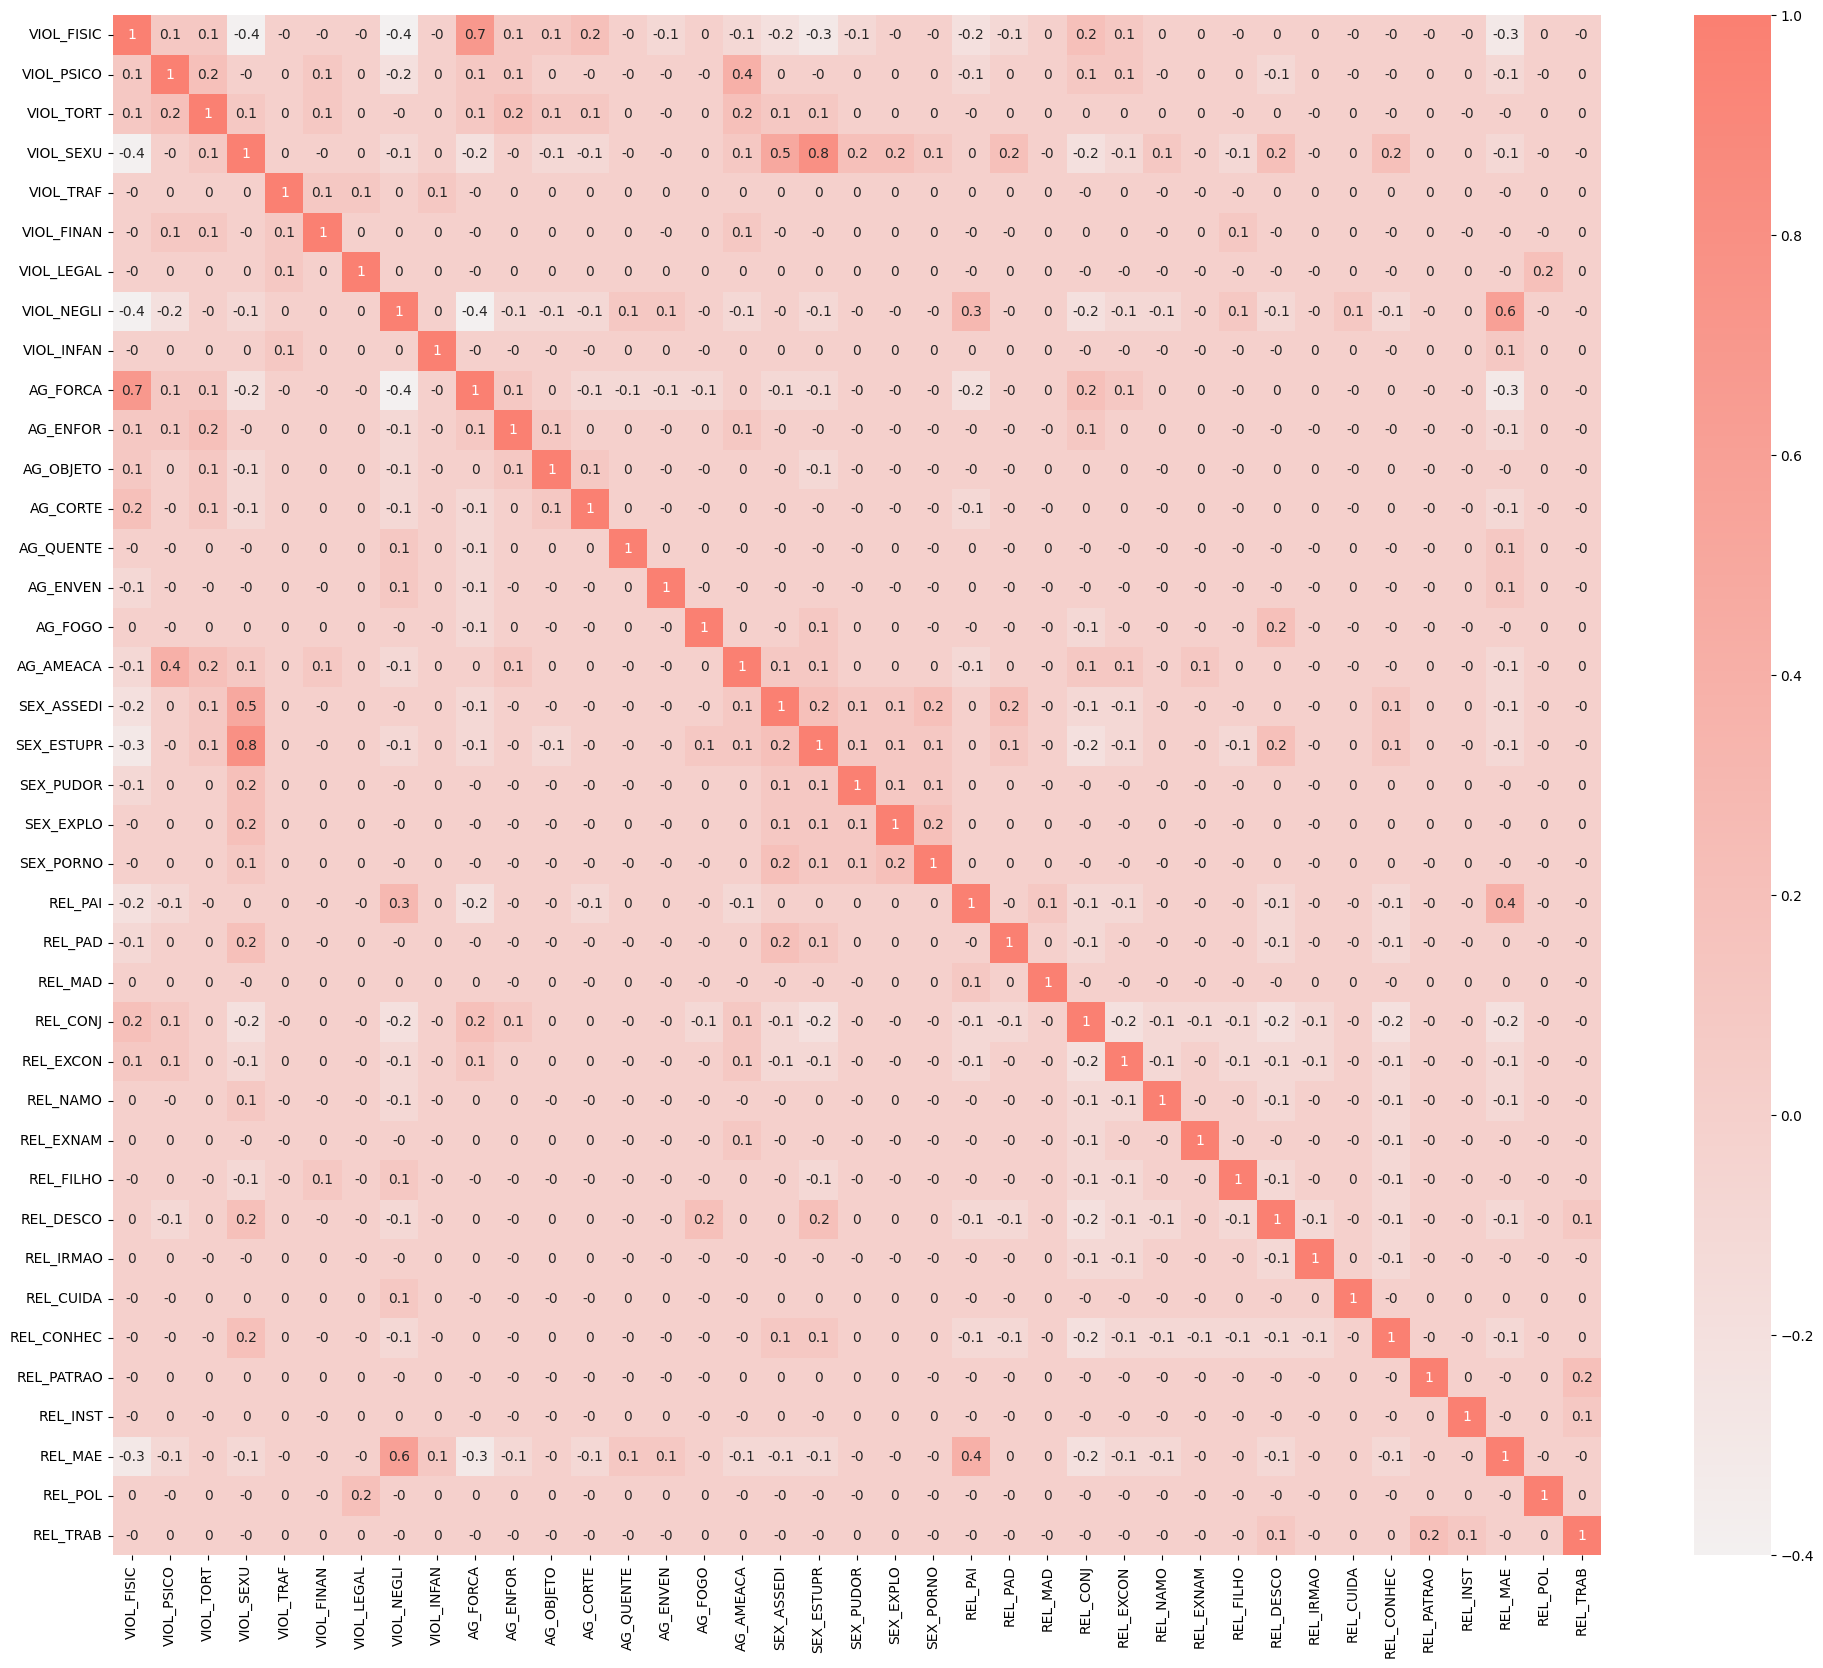

In [116]:
plt.figure(figsize=(24,20))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)